In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

mpl.rc('image', cmap='rocket')

In [2]:
# Load data
data = pd.read_excel('Ticket Details.xlsx')
data.head()

,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via
0,T01,High,California,Data Privacy,GDPR,IT,Vendor Cloud,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Bob,Excellent (5),Advised for a risk assessment,NaN,Personal Call
1,T02,Low,Minnesota,Cyber Consultation,BCP/DR,IT,On Prem Server,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Bob,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal
2,T03,High,Maryland,Cyber Security Breach,Firewall,HR,Vendor Cloud,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Allan,Excellent (5),Recommended Threat Assessment,NaN,Personal Call
3,T04,Low,New York,Security Gap,Password non-expiry,IT,On Prem Server,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Allan,Excellent (5),Advised for a risk assessment,NaN,Ticket Portal
4,T05,High,California,Cyber Security Breach,Malware Attack,Legal,On Prem Cloud,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Charlotte,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal


In [3]:
# Remove unwanted columns
data = data.drop(['Sub Category', 'Hosting', 'Assignee', 'Escalated'], axis=1)
data.head()

,Ticket No,Priority,State,Category,Skill Team,Create Date,Picked Date,Completed Date,Customer Rating,Outcome,Reached via
0,T01,High,California,Data Privacy,IT,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Excellent (5),Advised for a risk assessment,Personal Call
1,T02,Low,Minnesota,Cyber Consultation,IT,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Excellent (5),Recommended Threat Assessment,Ticket Portal
2,T03,High,Maryland,Cyber Security Breach,HR,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Excellent (5),Recommended Threat Assessment,Personal Call
3,T04,Low,New York,Security Gap,IT,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Excellent (5),Advised for a risk assessment,Ticket Portal
4,T05,High,California,Cyber Security Breach,Legal,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Excellent (5),Recommended Threat Assessment,Ticket Portal


In [4]:
# Look for missing values
data.isna().sum()
# no NA values in our dataset. No action needs to be taken

Ticket No          0
Priority           0
State              0
Category           0
Skill Team         0
Create Date        0
Picked Date        0
Completed Date     0
Customer Rating    0
Outcome            0
Reached via        0
dtype: int64

### 'State' Variable Exploratory Analysis

In [5]:
# Check values in the ‘State’ column and modify it if there are too many similar values
print('STATES REPRESENTED')
print(data['State'].unique())
print('-----------------------------')
print('# OF STATES REPRESENTED:', len(data['State'].unique()))

STATES REPRESENTED
['California' 'Minnesota' 'Maryland' 'New York' 'Texas' 'Utah'
 'New Jersey' 'Iowa' 'Florida' 'Michigan' 'Georgia' 'Louisiana'
 'Connecticut' 'Wisconsin' 'Oregon' 'Virginia' 'Pennsylvania'
 'Rhode Island' 'Ohio' 'Arizona' 'Massachusetts' 'New Mexico' 'Nevada'
 'Illinois' 'North Carolina' 'Missouri' 'Tennessee' 'Kansas' 'Colorado'
 'Indiana' 'Delaware' 'District of Columbia' 'Mississippi' 'Alabama'
 'Washington' 'Kentucky' 'South Carolina' 'Nebraska' 'Hawaii'
 'New Hampshire' 'Idaho' 'West Virginia' 'Maine' 'Oklahoma' 'Montana']
-----------------------------
# OF STATES REPRESENTED: 45


(array([242.,  93.,  50.,  64.,  44.,  59.,  33.,  30.,   6.,   6.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

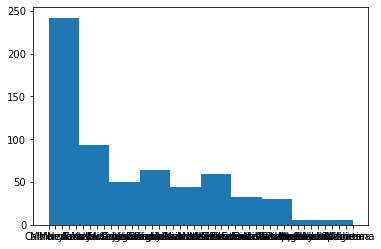

In [6]:
# Visualize distribution
plt.hist(data['State'])

It looks like one state represents a significant part of our data, while a few states have minimal significance. Let's explore this further.

In [7]:
# Check occurences per state
state_counts = data['State'].value_counts()
state_counts

California              131
New York                 56
Florida                  47
Texas                    38
Virginia                 38
Illinois                 25
Utah                     21
Georgia                  19
New Jersey               19
Colorado                 18
Massachusetts            15
Arizona                  15
Pennsylvania             14
North Carolina           14
Ohio                     13
Michigan                 12
Washington               11
Oregon                   10
District of Columbia      9
Maryland                  9
Wisconsin                 8
Minnesota                 8
Missouri                  8
Tennessee                 8
Indiana                   7
Connecticut               6
Iowa                      6
Alabama                   5
Louisiana                 5
Kansas                    5
Nevada                    4
Delaware                  3
Mississippi               3
South Carolina            3
Rhode Island              2
Kentucky            

Most states have less than 10 occurences. Let's keep the ones with more than that in a variable.

In [8]:
relevant_states = []
for state in state_counts.index:
    if state_counts[state] > 10:
        relevant_states.append(state)
relevant_states # states with more than 10 total tickets

['California',
 'New York',
 'Florida',
 'Texas',
 'Virginia',
 'Illinois',
 'Utah',
 'Georgia',
 'New Jersey',
 'Colorado',
 'Massachusetts',
 'Arizona',
 'Pennsylvania',
 'North Carolina',
 'Ohio',
 'Michigan',
 'Washington']

Now, let's compare the amount of tickets which come from California with the tickets from non-relevant states.

In [9]:
# Percent of total tickets that come from California
perc_cal = round(state_counts['California']/len(data['State']), 4) * 100
print('Percentage of tickets which come from California:', perc_cal, '%')

Percentage of tickets which come from California: 20.89 %


In [10]:
# Percent of total tickets which come from non relevant states
total_nonrelevantstates = 0
nonrelevantstate_count = 0
for state in state_counts.index:
    if state not in relevant_states:
        total_nonrelevantstates += state_counts[state]
        nonrelevantstate_count += 1
print('# of non-relevant states:', nonrelevantstate_count)
print('# of tickets from non-relevant states:', total_nonrelevantstates)

perc_nonrelevantstates = round(total_nonrelevantstates/len(data['State']), 4) * 100
print('Percentage of tickets which come from non-relevant states:', perc_nonrelevantstates, '%')

# of non-relevant states: 28
# of tickets from non-relevant states: 121
Percentage of tickets which come from non-relevant states: 19.3 %


We can observe that the number tickets coming from California (20.89%), are around the same as the number of tickets coming from states we labeled as non-relevant (19.3%).

### 'Category' Variable Exploratory Analysis

In [11]:
# Check values in the ‘State’ column and modify it if there are too many similar values
print('CATEGORIES REPRESENTED')
print(data['Category'].unique())
print('-----------------------------')
print('# OF CATEGORIES REPRESENTED:', len(data['Category'].unique()))

CATEGORIES REPRESENTED
['Data Privacy' 'Cyber Consultation' 'Cyber Security Breach'
 'Security Gap' 'Data Leak']
-----------------------------
# OF CATEGORIES REPRESENTED: 5


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

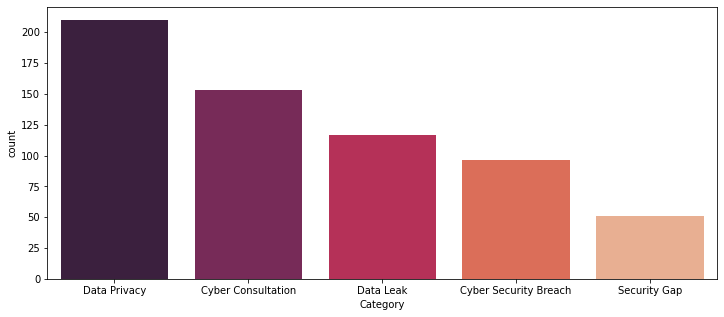

In [12]:
# Visualize distribution
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(data['Category'], palette = 'rocket', order = data['Category'].value_counts().index)

As can be seen above, data privacy is the most frequent category in our dataset, while security gap is the least frequent.

### 'Customer Rating' Variable Exploratory Analysis

In [13]:
# Transform ‘Customer Rating’ variable into ordinal numerical type (2 - ‘Unsatisfactory (2)’; 3 - ‘Satisfactory (3)’; 4 – ‘Good (4)’; 5 – ‘Excellent (5)’
def transform_crat(val):
    if val == 'Unsatisfactory (2)': 
        return 2
    elif val == 'Satisfactory (3)': 
        return 3
    elif val == 'Good (4)': 
        return 4
    elif val == 'Excellent (5)': 
        return 5
data['Customer Rating (#)'] = data.apply(lambda row: transform_crat(row['Customer Rating']), axis=1)

In [14]:
# Check if all values were converted correctly
print(data.head())
print(data.tail())
# looks good

  Ticket No Priority       State               Category Skill Team  \
0       T01     High  California           Data Privacy         IT   
1       T02      Low   Minnesota     Cyber Consultation         IT   
2       T03     High    Maryland  Cyber Security Breach         HR   
3       T04      Low    New York           Security Gap         IT   
4       T05     High  California  Cyber Security Breach      Legal   

          Create Date         Picked Date       Completed Date  \
0 2021-01-03 12:46:36 2021-01-03 12:48:31  2021-06-03 16:35:26   
1 2021-01-04 09:52:44 2021-01-04 10:12:46  2021-01-17 09:44:31   
2 2021-01-04 10:11:07 2021-01-04 10:11:31  2021-01-04 11:43:40   
3 2021-01-04 10:55:13 2021-01-04 10:55:31  2021-01-18 11:06:54   
4 2021-01-04 21:58:33 2021-01-04 22:13:03  2021-01-11 12:20:42   

  Customer Rating                        Outcome    Reached via  \
0   Excellent (5)  Advised for a risk assessment  Personal Call   
1   Excellent (5)  Recommended Threat Assessment

In [15]:
# Drop 'Customer Rating' column
data = data.drop(['Customer Rating'], axis=1)
data.head()

,Ticket No,Priority,State,Category,Skill Team,Create Date,Picked Date,Completed Date,Outcome,Reached via,Customer Rating (#)
0,T01,High,California,Data Privacy,IT,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Advised for a risk assessment,Personal Call,5
1,T02,Low,Minnesota,Cyber Consultation,IT,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Recommended Threat Assessment,Ticket Portal,5
2,T03,High,Maryland,Cyber Security Breach,HR,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Recommended Threat Assessment,Personal Call,5
3,T04,Low,New York,Security Gap,IT,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Advised for a risk assessment,Ticket Portal,5
4,T05,High,California,Cyber Security Breach,Legal,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Recommended Threat Assessment,Ticket Portal,5


In [16]:
# Descriptive stats
data['Customer Rating (#)'].describe()

count    627.000000
mean       4.051037
std        1.130726
min        2.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Customer Rating (#), dtype: float64

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Rating (#)', ylabel='count'>

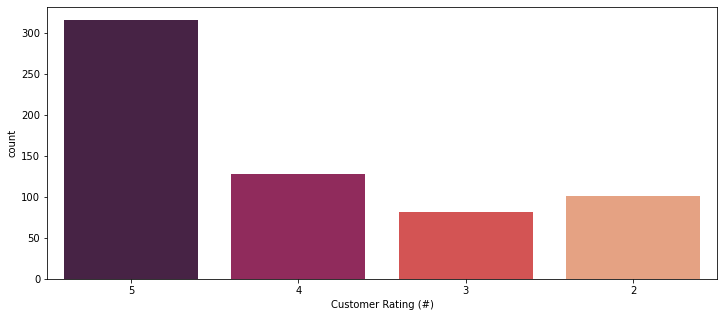

In [17]:
# Visualize distribution
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(data['Customer Rating (#)'], palette = 'rocket', order = [5,4,3,2])

### 'Create Date' and 'Completed Date' Variables Exploratory Analysis

An error was noticed after initally trying to plot a histogram of 'Completed Date' variable. Let's investigate and fix it.

In [18]:
# Check types
data.info()
# 'Completed Date' was not initially converted to a datetime Dtype and is an object type
# after troubleshooting, it was noticed that a value in the 'Completed Date' column is of a different format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticket No            627 non-null    object        
 1   Priority             627 non-null    object        
 2   State                627 non-null    object        
 3   Category             627 non-null    object        
 4   Skill Team           627 non-null    object        
 5   Create Date          627 non-null    datetime64[ns]
 6   Picked Date          627 non-null    datetime64[ns]
 7   Completed Date       627 non-null    object        
 8   Outcome              627 non-null    object        
 9   Reached via          627 non-null    object        
 10  Customer Rating (#)  627 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 54.0+ KB


In [19]:
# Convert into correct format
# incorrect data point has 'Completed Date' of '31-02-2021  11:30:57'
# February does not have a 31st, therefore, let's manually change this to be March 1st

# original value
print(data.iloc[598]['Completed Date'])
# store index of incorrect date
inc_ind = data[data['Completed Date'] == '31-02-2021  11:30:57']['Completed Date'].index[0]

# manually change date and store its value
data.replace(to_replace='31-02-2021  11:30:57', value = '01-03-2021  11:30:57', inplace=True)
incorrect_date = data.iloc[598]['Completed Date']

# change date format
correct_date = datetime.strptime(incorrect_date, '%d-%m-%Y %H:%M:%S')
data.loc[598]['Completed Date'] = correct_date

# New value
print(data.loc[598]['Completed Date'])

31-02-2021  11:30:57
01-03-2021  11:30:57


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25008\10145395.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[598]['Completed Date'] = correct_date


In [20]:
# Transform column to be of datetime type
data['Completed Date'] = pd.to_datetime(data['Completed Date'])

data.info()
# Successfully converted column to be of datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticket No            627 non-null    object        
 1   Priority             627 non-null    object        
 2   State                627 non-null    object        
 3   Category             627 non-null    object        
 4   Skill Team           627 non-null    object        
 5   Create Date          627 non-null    datetime64[ns]
 6   Picked Date          627 non-null    datetime64[ns]
 7   Completed Date       627 non-null    datetime64[ns]
 8   Outcome              627 non-null    object        
 9   Reached via          627 non-null    object        
 10  Customer Rating (#)  627 non-null    int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 54.0+ KB


Text(0.5, 1.0, 'Completed Date Distribution')

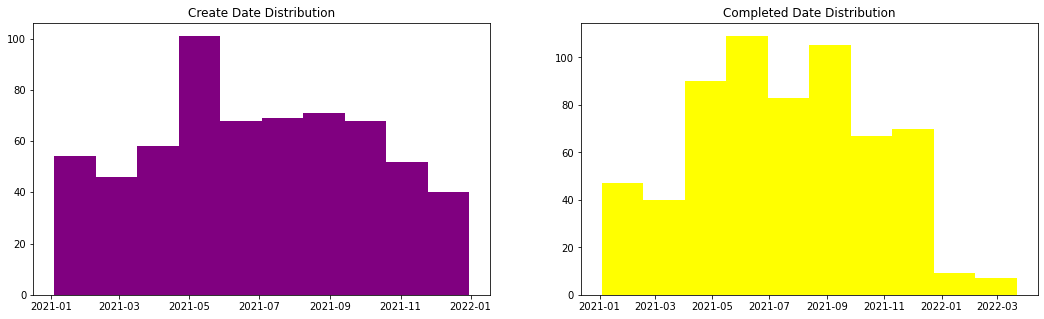

In [31]:
# Visualize ‘Create Date’  and 'Completed Date' variables distribution
fig = plt.figure(figsize=(18,5))
# 'Create Date' plot
ax1 = fig.add_subplot(121)
ax1.hist(data['Create Date'], color='purple')
ax1.set_title('Create Date Distribution')

# 'Completed Date' plot
ax2 = fig.add_subplot(122)
ax2.hist(data['Completed Date'], color = 'yellow')
ax2.set_title('Completed Date Distribution')

Text(0.5, 1.0, 'Stacked histograms of Create Date and Completed Date')

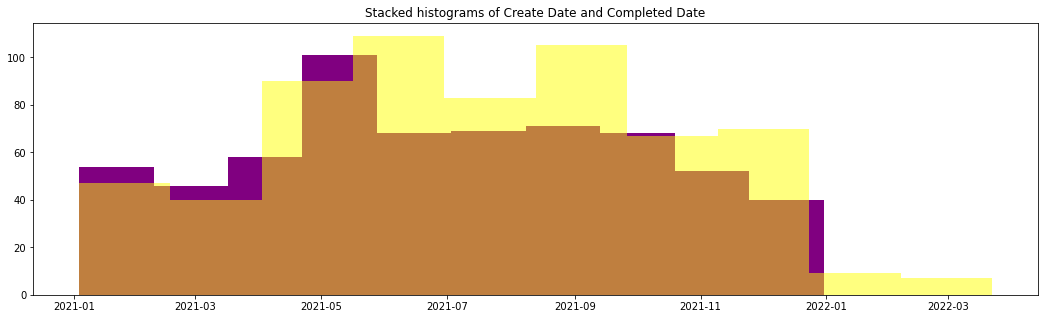

In [22]:
# Set histograms on top of each other
fig = plt.figure(figsize=(18,5))
# 'Create Date' and 'Completed Date' stacked plots
ax1 = fig.add_subplot()
ax1.hist(data['Create Date'], color='purple')
ax1.hist(data['Completed Date'], alpha = 0.5, color = 'yellow')
ax1.set_title('Stacked histograms of Create Date and Completed Date')

In [23]:
# Create new column to represent the difference between ticket request creation date and completion date in days
data['Total Ticket Time'] = round((data['Completed Date'] - data['Create Date']) / np.timedelta64(1, 'D'),2)

data.head() # updated date with new 'Total Ticket Time' column

,Ticket No,Priority,State,Category,Skill Team,Create Date,Picked Date,Completed Date,Outcome,Reached via,Customer Rating (#),Total Ticket Time
0,T01,High,California,Data Privacy,IT,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Advised for a risk assessment,Personal Call,5,151.16
1,T02,Low,Minnesota,Cyber Consultation,IT,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Recommended Threat Assessment,Ticket Portal,5,12.99
2,T03,High,Maryland,Cyber Security Breach,HR,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Recommended Threat Assessment,Personal Call,5,0.06
3,T04,Low,New York,Security Gap,IT,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Advised for a risk assessment,Ticket Portal,5,14.01
4,T05,High,California,Cyber Security Breach,Legal,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Recommended Threat Assessment,Ticket Portal,5,6.60


In [24]:
# Calculate mean ticket time
print('Mean ticket time:', round(data['Total Ticket Time'].mean(),2), 'days')

Mean ticket time: 16.36 days


In [29]:
# Is there a difference in total ticket time depending on the category of the request?
print('MEAN TICKET TIMES BY CATEGORY')
for cat in data['Category'].unique():
    print(cat, ':', round(data[data['Category'] == cat]['Total Ticket Time'].mean(), 2), 'days')

MEAN TICKET TIMES BY CATEGORY
Data Privacy : 13.02 days
Cyber Consultation : 14.93 days
Cyber Security Breach : 15.34 days
Security Gap : 18.23 days
Data Leak : 24.24 days


In [30]:
# What about for customer ratings?
print('MEAN TICKET TIMES BY CUSTOMER RATING')
for rat in data['Customer Rating (#)'].unique():
    print(rat,'stars:', round(data[data['Customer Rating (#)'] == rat]['Total Ticket Time'].mean(), 2), 'days')

MEAN TICKET TIMES BY CUSTOMER RATING
5 stars: 16.26 days
3 stars: 17.25 days
4 stars: 17.63 days
2 stars: 14.32 days


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Rating (#)', ylabel='Total Ticket Time'>

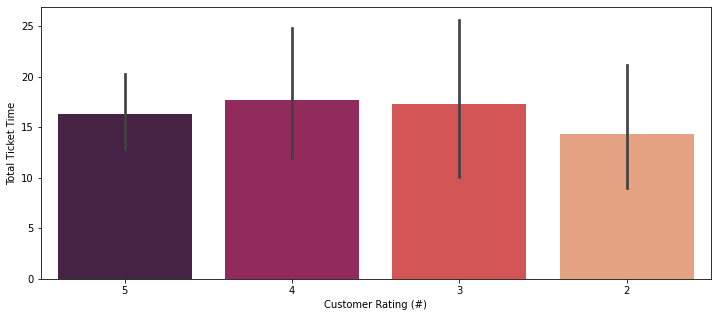

In [78]:
# 'Customer Rating (#)' vs 'Total Ticket Time' bar plot
sns.barplot(data['Customer Rating (#)'], data['Total Ticket Time'], palette='rocket', order=[5,4,3,2])

The total ticket time seems to be very similar regardless of the customer rating. This indicates that the total ticket time does not seem to be very significant to customer satisfaction.

Now, let's analyze this by category.

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\G

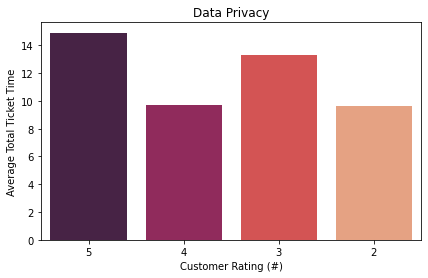

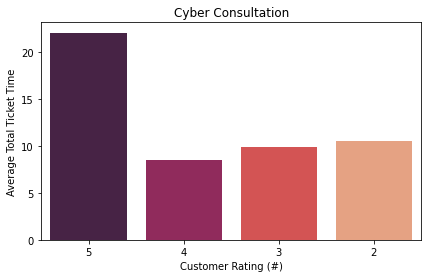

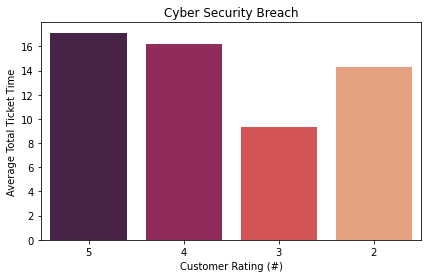

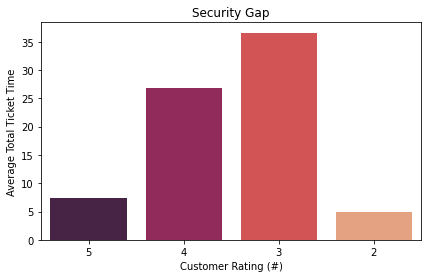

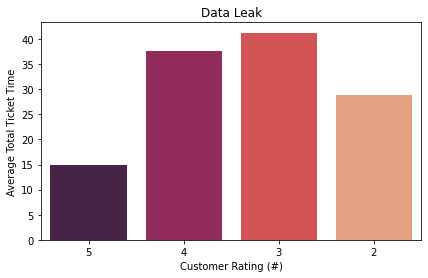

In [95]:
# Visualize mean total ticket time by customer rating for each category
for cat in data['Category'].unique():
    # set plot figure
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(121)
    
    # create dataframe containing only values of the category being evaluated and grouped by customer rating, take column means
    gby_rat = data[data['Category'] == cat].groupby(['Customer Rating (#)']).mean()
    gby_rat.reset_index(inplace=True)
    
    # plot mean ticket time per customer rating for the category being evaluated
    ax1 = sns.barplot(gby_rat['Customer Rating (#)'], gby_rat['Total Ticket Time'], palette='rocket', order=[5,4,3,2])
    ax1.set_title(cat)
    plt.ylabel('Average Total Ticket Time')

This relationships seems to vary depending on the category of the ticket request.

For cyber consultation, for example, a higher average ticket time seems to have a higher customer satisfaction (since 5 stars have by far the highest average ticket time). On the other hand, clients who report a data leak issue seem to have a low tolerance for total ticket time. For this category, the best rating (5 stars) have, by far, the lowest average total ticket time.

The reason why these relationships vary is uncertain and may require domain-specific knowledge (or be random). 